In [119]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Dorawanie bazy filmów i gatunków:

In [120]:
genres = pd.read_csv('tmdb_genres.csv')
movies = pd.read_csv('tmdb_movies.csv')

Zwróć listę 10 najwyżej ocenianych filmów (vote_average), których liczba głosów (vote_count) jest większa od 3. kwartyla rozkładu liczby głosów.

In [121]:
third_quan = movies['vote_count'].quantile(0.75) # obliczam 3 kwantyl dla rozkładu liczby głosów

t1 = movies[movies['vote_count'] > third_quan] # oceniam, które filmy mają vote_count większą od third_quan

t1.sort_values(by='vote_average', ascending=False, inplace=True) # sortuję listę po średniej wartości głosów malejąco

t1[['original_title','vote_average']].iloc[:10] # wyświetlam 1o najwyżej ocenianych filmów 

C:\Users\Marcin\AppData\Local\Temp\ipykernel_4104\2908107918.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  t1.sort_values(by='vote_average', ascending=False, inplace=True) # sortuję listę po średniej wartości głosów malejąco


,original_title,vote_average
1881,The Shawshank Redemption,8.50
3337,The Godfather,8.40
2294,千と千尋の神隠し,8.30
3865,Whiplash,8.30
2731,The Godfather: Part II,8.30
3232,Pulp Fiction,8.30
1818,Schindler's List,8.30
662,Fight Club,8.30
2170,Psycho,8.20
1847,GoodFellas,8.20


Pogrupuj tabelę w taki sposób, aby otrzymać średni przychód (revenue) oraz średni budżet (budget) w danym roku dla filmów opublikowanych od 2010 (włącznie) do 2016 roku (włącznie). Następnie na tej podstawie stwórz wykres, w którym średnie przychody są wykresem kolumnowym, a średni budżet wykresem liniowym na tych samych osiach. Sformatuj odpowiednio oś X oraz oś Y. Dodaj tytuł wykresu, oraz legendę, która znajduje się w prawym górnym rogu płótna, lecz poza obszarem osi.

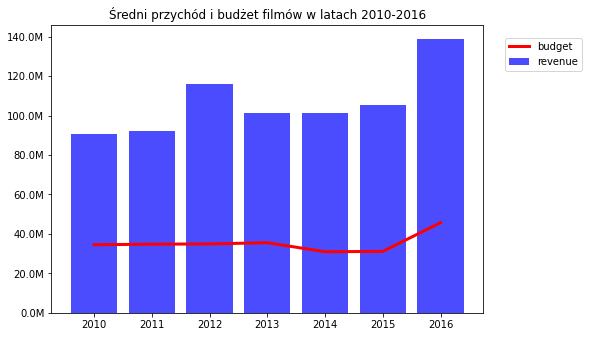

In [122]:
movies['release_date'] = pd.to_datetime(movies['release_date'], format='%Y-%m-%d') # zmieniam foramt daty,aby móc ją wykorzystać do grupowania

t2 = movies[(movies['release_date'] >= '2010-01-01') & (movies['release_date'] <= '2016-12-31')] #tabela filmów z przedziału 2010-2016

t3 = t2.groupby(t2['release_date'].apply(lambda x: x.year)).mean() # grupujemy tabelę, aby otrzymać średnią wartości w poszczególnych latach (x.year)

x = t3.index # w tabeli t3 indeksem są lata
y = t3['budget'] # ustalam y dla wykresu ze średnią budżetu
y2 = t3['revenue'] # ustalam y dla wykresu ze średnią przychodu

# tworzę wykres

fig, ax= plt.subplots()
axes = fig.add_axes([0,0,1,1])
axes.plot(x, y, color='red', linewidth = 3, label='budget')
axes.bar(x, y2, color='blue', alpha = 0.7, label='revenue')
plt.title('Średni przychód i budżet filmów w latach 2010-2016')

def million(x, pos):  # funkcja zmieniająca opis osi y
    return '{:2.1f}M'.format(x*1e-6)

formatter = plt.FuncFormatter(million)
axes.yaxis.set_major_formatter(formatter) # zmieniamy opis osi y

axes.legend(loc=(1.05,0.84))
plt.show()


Baza filmów zawiera kolumnę z id gatunku (genre_id). Na tej podstawie połącz ze sobą bazę filmów z bazą gatunków, tak aby w bazie filmów można było odczytać nazwę gatunku filmu.

In [129]:
genres.rename(columns={'Unnamed: 0': 'genre_id'}, inplace=True)
movies = movies.merge(genres, how='inner', on='genre_id', copy=False)
movies[['original_title', 'genres_x']].head(1) # wy tym wypadku coś nie działa duplikują cię kolumny z gatunkiem filmów

C:\Users\Marcin\AppData\Local\Temp\ipykernel_4104\4171961466.py:2: FutureWarning: Passing 'suffixes' which cause duplicate columns {'genres_x'} in the result is deprecated and will raise a MergeError in a future version.
  movies = movies.merge(genres, how='inner', on='genre_id', copy=False)


,original_title,genres_x,genres_x,genres_x
0,Avatar,Action,Action,Action


Jaki gatunek filmu z bazy pojawia się w niej najczęściej? Ile filmów tego gatunku znajduje się w bazie?

In [143]:
counts = movies['genres_x'].value_counts()
counts.loc[counts == counts.max()] # nie działa przez bład w poprzednim zadaniu

Filmy, którego gatunku trwają średnio najdłużej (runtime)?

In [144]:
run_time = movies.groupby('genres_x').mean()
run_time['runtime'].sort_values(ascending=False)

Stwórz histogram czasu trwania filmów z gatunku, który cechuje się największym średnim czasem trwania.

In [ ]:
longest_movie = movie